In [16]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [17]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [7]:
df_january = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
print(f'Numero de col january file: {df_january.shape[1]}')
df_february = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')
print(f'Numero de col january file: {df_february.shape[1]}')

Numero de col january file: 19
Numero de col january file: 19


In [8]:
def std_duration(df):
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    return df['duration'].std()

In [9]:
print(std_duration(df_january))

42.594351241920904


In [10]:
df_january_filtered = df_january[(df_january.duration >= 1) & (df_january.duration <= 60)]

In [11]:
print(100*(df_january_filtered.shape[0])/(df_january.shape[0]))

98.1220282212598


In [18]:
categorical = ['PULocationID', 'DOLocationID']

In [19]:
df = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
train_dicts = df[categorical].to_dict(orient='records')

In [20]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [21]:
target = 'duration'
y_train = df[target].values

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}')

Train RMSE: 7.6492610279057605


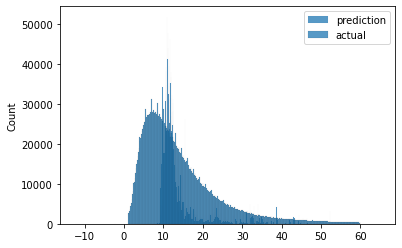

In [23]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

In [24]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].astype('str')
    
    return df

In [25]:
df_val = read_data('./data/yellow_tripdata_2023-02.parquet')

In [ ]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [9]:
X_val = dv.transform(val_dicts) 
y_val = df_val.duration.values

NameError: name 'dv' is not defined

In [5]:
y_pred = lr.predict(X_val)
print(f'Val RMSE: {mean_squared_error(y_val, y_pred, squared=False)}')

NameError: name 'lr' is not defined